<a href="https://colab.research.google.com/github/nguyenthanhdat20130013/Machine-Learning/blob/main/Lab_4_20130013_NguyenThanhDat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [33]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




Accuracy :  0.9777777777777777
Precision score :  [1.         1.         0.92857143]


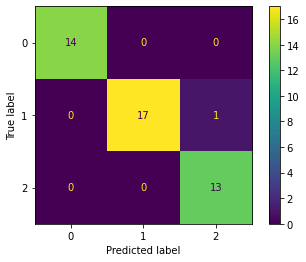

In [35]:
data4 = datasets.load_iris()
X = data4['data']
y = data4['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
print ("Precision score : ", precision_score(y_test, y_pred, average=None))

accuracy_score_tsk1 = accuracy_score(y_test, y_pred)
precision_score_tsk1 = precision_score(y_test, y_pred, average="macro")
recall_score_tsk1 = recall_score(y_test, y_pred, average="macro")
f1_tsk1 = f1_score(y_test, y_pred, average="macro")


#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.9685185185185186
Precision score :  0.9677661257423653


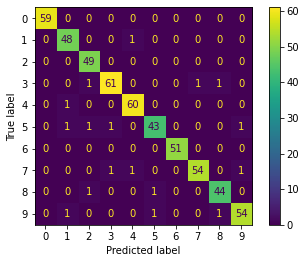

In [36]:
mnist = datasets.load_digits()
X = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
print ("Precision score : ", precision_score(y_test, y_pred, average="macro"))

accuracy_score_tsk2 = accuracy_score(y_test, y_pred)
precision_score_tsk2 = precision_score(y_test, y_pred, average="macro")
recall_score_tsk2 = recall_score(y_test, y_pred, average="macro")
f1_tsk2 = f1_score(y_test, y_pred, average="macro")


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


Best k value: 1


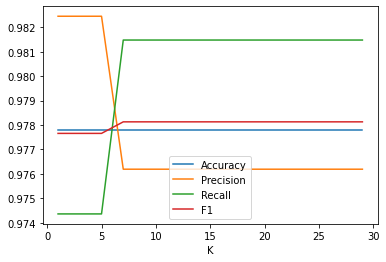

In [37]:
from sklearn.preprocessing import label_binarize
data4 = datasets.load_iris()
X = data4['data']
y = data4['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
k_range = range(1,30,2)
accs= []
pre = []
recalls = []
f1 = []
for k in k_range :
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred, average="macro"))
    recalls.append(recall_score(y_test, y_pred, average="macro"))
    f1.append(f1_score(y_test, y_pred, average="macro"))
plt.plot(k_range, accs, label="Accuracy")
plt.plot(k_range, pre, label="Precision")
plt.plot(k_range, recalls, label="Recall")
plt.plot(k_range, f1, label="F1")
plt.xlabel("K")
plt.legend()
best_k = k_range[accs.index(max(accs))]
#print best k value
print("Best k value:", best_k)
#find best of kNN
best_accuracy_score_tsk3 = max(accs)
best_precision_score_tsk3 = max(pre)
best_recall_score_tsk3 = max(recalls)
best_f1_tsk3 = max(f1)

In [38]:
records = [('kNN (Best)',best_accuracy_score_tsk3, best_precision_score_tsk3, best_recall_score_tsk3, best_f1_tsk3), 
           ('Logistic regression',accuracy_score_tsk1, precision_score_tsk1, recall_score_tsk1, f1_tsk1)
          ]
           
# DataFrame
print("Task 3.2")
df = pd.DataFrame(data = records, columns = ['Algorithm','Accuracy', 'Precision', 'Recall',' f1'])
df

Task 3.2


,Algorithm,Accuracy,Precision,Recall,f1
0,kNN (Best),0.977778,0.982456,0.981481,0.978131
1,Logistic regression,0.977778,0.976190,0.981481,0.978131


#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


Best k value: 1


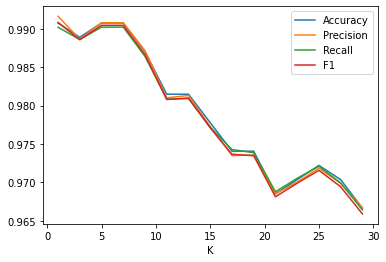

In [39]:
mnist = datasets.load_digits()
X = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
k_range = range(1,30,2)
accs= []
pre = []
recalls = []
f1 = []
for k in k_range :
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred, average="macro"))
    recalls.append(recall_score(y_test, y_pred, average="macro"))
    f1.append(f1_score(y_test, y_pred, average="macro"))
plt.plot(k_range, accs, label="Accuracy")
plt.plot(k_range, pre, label="Precision")
plt.plot(k_range, recalls, label="Recall")
plt.plot(k_range, f1, label="F1")
plt.xlabel("K")
plt.legend()

best_k = k_range[accs.index(max(accs))]
#print best k value
print("Best k value:", best_k)

#find best of kNN
best_accuracy_score_tsk4 = max(accs)
best_precision_score_tsk4 = max(pre)
best_recall_score_tsk4 = max(recalls)
best_f1_tsk4 = max(f1)


In [40]:
records = [('kNN (Best)',best_accuracy_score_tsk4, best_precision_score_tsk4, best_recall_score_tsk4, best_f1_tsk4), 
           ('Logistic regression',accuracy_score_tsk2, precision_score_tsk2, recall_score_tsk2, f1_tsk2)  ]
           
# DataFrame
print("Task 4.2")
df2 = pd.DataFrame(data = records, columns = ['Algorithm','Accuracy', 'Precision', 'Recall',' f1'])
df2

Task 4.2


,Algorithm,Accuracy,Precision,Recall,f1
0,kNN (Best),0.990741,0.991622,0.990208,0.990817
1,Logistic regression,0.968519,0.967766,0.968248,0.967788


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [41]:
df = pd.read_csv('spambase.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=0)
y_pred = dt.fit(X_train, y_train).predict(X_test)

accuracy_t = accuracy_score(y_test, y_pred)
precision_t = precision_score(y_test, y_pred)
recall_t = recall_score(y_test, y_pred)
f1_t = f1_score(y_test, y_pred)

# Define the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
y_pred = knn.fit(X_train, y_train).predict(X_test)

accuracy_k = accuracy_score(y_test, y_pred)
precision_k = precision_score(y_test, y_pred)
recall_k = recall_score(y_test, y_pred)
f1_k = f1_score(y_test, y_pred)

# Define the Logistic Regression classifier
lr = LogisticRegression(random_state=0)
y_pred = lr.fit(X_train, y_train).predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)


recordss = [('Decision Tree',accuracy_t, precision_t, recall_t, f1_t),
           ('kNN',accuracy_k, precision_k,recall_k, f1_k), 
           ('Logistic Regression',accuracy_lr, precision_lr, recall_lr, f1_lr)  ]
           
# DataFrame
print("Task 4.2")
df3 = pd.DataFrame(data = recordss, columns = ['Algorithm','Accuracy', 'Precision', 'Recall',' f1'])
df3


Task 4.2


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Algorithm,Accuracy,Precision,Recall,f1
0,Decision Tree,0.892831,0.867621,0.867621,0.867621
1,kNN,0.800145,0.770554,0.720930,0.744917
2,Logistic Regression,0.908038,0.897059,0.872987,0.884859


#Finally,
Save a copy in your Github. Remember renaming the notebook.